In [1]:
#Importing required Libraries

import SimpleITK as sitk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import glob
import cv2

from dltk.io import preprocessing
from skimage import filters
import os
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Image Data Preparation

In [3]:
#Load AIBL CSV dataset

df = pd.read_excel("./AIBLdataset.xlsx")
df

,Path,File,IMG_DIRECTORY,F_ID,GENDER,Hand,AGE,Educ,SES,MMSE,...,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE
0,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_100_MR_MPRAGE_ADNI_confirmed__br_raw_2009...,NaN,NaN,M,NaN,78.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1000_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,F,NaN,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1001_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,M,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1005_MR_flair_t2_spc_irprep_ns_sag_p2_1mm...,NaN,NaN,F,NaN,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1005_MR_MPRAGE_SAG_ISO_p2_ND_br_raw_20140...,NaN,NaN,F,NaN,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED__br_raw_200903...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED_CORONAL__br_ra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED_REPEAT_br_raw_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_109_MR_MPRAGE_ADNI_confirmed__br_raw_2013...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Finding Columns with missing values

df.isna().sum()

Path                   0
File                   0
IMG_DIRECTORY       1902
F_ID                1902
GENDER                 5
                    ... 
OCCUPATION_ID       1902
QUALIFICATION_ID    1902
DOB                 1902
DATE_AVAILABLE      1902
STUDY_DATE          1902
Length: 107, dtype: int64

In [5]:
#Finding any duplicated records
df.duplicated().sum()

0

In [17]:
#Obtaing the Pateient ID from the path Column

#Intialize list to store Pateniet IDs from CSV dataset
adjustedpath = []

#Loop through AIBL CSV dataset
for index,row in df.iterrows():
    #Add the PatientIDs present in CSV path column to list
    if row["Path"] != "":
        adjustedpath.append(row["Path"].split("\\")[-1])
adjustedpath

['S61721',
 'S61337',
 'S61338',
 'S231768',
 'S231764',
 'S85107',
 'S64516',
 'S237660',
 'S235288',
 'S236124',
 'S235334',
 'S61702',
 'S61703',
 'S733091',
 'S235717',
 'S235726',
 'S72648',
 'S61712',
 'S231543',
 'S231730',
 'S61688',
 'S64483',
 'S72651',
 'S61355',
 'S733127',
 'S62416',
 'S60934',
 'S64484',
 'S231515',
 'S231512',
 'S232413',
 'S232423',
 'S232416',
 'S61689',
 'S82080',
 'S60931',
 'S62417',
 'S61713',
 'S64505',
 'S84839',
 'S82082',
 'S82092',
 'S61328',
 'S67566',
 'S62599',
 'S85233',
 'S59813',
 'S64517',
 'S231124',
 'S62405',
 'S235989',
 'S235985',
 'S236148',
 'S236159',
 'S235313',
 'S235312',
 'S235990',
 'S235986',
 'S235326',
 'S235296',
 'S235300',
 'S236152',
 'S236155',
 'S235993',
 'S235994',
 'S235301',
 'S235311',
 'S733082',
 'S236010',
 'S237656',
 'S237661',
 'S64236',
 'S235722',
 'S236411',
 'S236405',
 'S231544',
 'S231726',
 'S236008',
 'S733139',
 'S235284',
 'S236434',
 'S236436',
 'S231113',
 'S63896',
 'S231527',
 'S231684',
 '

In [68]:
#Adding the Patient ID to the original dataframe
df["Adjusted Path"] = adjustedpath
df

,Path,File,IMG_DIRECTORY,F_ID,GENDER,Hand,AGE,Educ,SES,MMSE,...,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,Adjusted Path
0,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_100_MR_MPRAGE_ADNI_confirmed__br_raw_2009...,NaN,NaN,M,NaN,78.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61721
1,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1000_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,F,NaN,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61337
2,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1001_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,M,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61338
3,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1005_MR_flair_t2_spc_irprep_ns_sag_p2_1mm...,NaN,NaN,F,NaN,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S231768
4,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1005_MR_MPRAGE_SAG_ISO_p2_ND_br_raw_20140...,NaN,NaN,F,NaN,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S231764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED__br_raw_200903...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S65034
1898,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED_CORONAL__br_ra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S65035
1899,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_0151083_MR_MPRAGE_MODIFIED_REPEAT_br_raw_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S65036
1900,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_109_MR_MPRAGE_ADNI_confirmed__br_raw_2013...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S179666


In [20]:
#Saving the dataframe as backup in a excel sheet
df.to_excel("newAIBL.xlsx",index=False)

In [119]:
#Listing the directories which contain images
path = "./AIBL/"

print(os.listdir(path))

['0151083', '100', '1000', '1001', '1005', '1013', '102', '1020', '1024', '1025', '1027', '1032', '1046', '1049', '105', '1050', '1056', '1066', '1067', '107', '1078', '1089', '1090', '1094', '1095', '1098', '1100', '1102', '1109', '111', '1122', '1125', '1135', '1139', '1145', '1146', '1147', '1153', '1157', '117', '1174', '1175', '118', '1183', '1184', '1186', '1187', '1191', '1192', '1193', '1194', '1196', '1198', '1209', '121', '1214', '1215', '1218', '1222', '1224', '1225', '1228', '123', '1230', '1234', '1236', '1237', '1238', '1241', '1249', '125', '1251', '1255', '1257', '1258', '126', '1260', '1261', '1262', '1264', '1265', '1266', '127', '1272', '1273', '1277', '1278', '1279', '1281', '1283', '1285', '1286', '1287', '1290', '1291', '1295', '1296', '1298', '1301', '1302', '1303', '1304', '1308', '1309', '1311', '1312', '1316', '1321', '1322', '1324', '1327', '1328', '1329', '1330', '1332', '1334', '1335', '1337', '1339', '134', '1340', '1341', '1343', '1344', '1345', '1349', '

In [27]:
len(os.listdir(path))

666

In [40]:
#Making a list of Pateniet IDs with MRI images

#Intialize list to store Pateniet IDs from MRI images
actualimg = []

#Loop through image directory
for (root,dirs,files) in os.walk(path, topdown=True):
    for direct in dirs:
        #Add the PatientIDs present in image directory to list
        if direct.startswith("S"):
            print(direct)
            actualimg.append(direct)


S65034
S65035
S65036
S61721
S61337
S61338
S231764
S85107
S64516
S237660
S235288
S236124
S235334
S61702
S61703
S235717
S72648
S61712
S231543
S61688
S64483
S72651
S61355
S62416
S60934
S64484
S231512
S232423
S232416
S61689
S82080
S60931
S62417
S61713
S64505
S84839
S82082
S82092
S61328
S67566
S62599
S85233
S59813
S64517
S231124
S62405
S235989
S236148
S235313
S235990
S235326
S235296
S236152
S235993
S235311
S236010
S237656
S64236
S235722
S236411
S231544
S236008
S235284
S236434
S231113
S63896
S231527
S231536
S232449
S231121
S235951
S237670
S231560
S64258
S231747
S235747
S232354
S232351
S231773
S63860
S237664
S236369
S236353
S237659
S236372
S235289
S235725
S237690
S237674
S232405
S232395
S232457
S236335
S235291
S235997
S231525
S235319
S235970
S236005
S231510
S236370
S237686
S232403
S232387
S235758
S232346
S231572
S235744
S235741
S236394
S236416
S236413
S231766
S237685
S232430
S237684
S235281
S235332
S235297
S237691
S231531
S232437
S231530
S232411
S236340
S236400
S64471
S237682
S236381
S236378


In [44]:
#Fininding the Patient IDs appearing in both the CSV and Image Directories
ids =list(set(actualimg) & set(adjustedpath))
ids

['S82128',
 'S232425',
 'S231552',
 'S231773',
 'S236430',
 'S235311',
 'S82617',
 'S64474',
 'S236156',
 'S232355',
 'S235769',
 'S236125',
 'S235297',
 'S64261',
 'S61329',
 'S59804',
 'S84913',
 'S232328',
 'S63062',
 'S761823',
 'S236422',
 'S753183',
 'S64484',
 'S63478',
 'S231537',
 'S236402',
 'S232915',
 'S231507',
 'S82566',
 'S231776',
 'S236022',
 'S237680',
 'S784207',
 'S231530',
 'S781229',
 'S61689',
 'S231117',
 'S231540',
 'S231560',
 'S236392',
 'S235719',
 'S63883',
 'S82477',
 'S231547',
 'S235971',
 'S82559',
 'S762389',
 'S82126',
 'S752238',
 'S231518',
 'S82542',
 'S235281',
 'S231506',
 'S232365',
 'S231531',
 'S236018',
 'S733138',
 'S237665',
 'S236398',
 'S237654',
 'S231125',
 'S235282',
 'S231538',
 'S235999',
 'S235967',
 'S235307',
 'S235733',
 'S236370',
 'S63491',
 'S236350',
 'S231743',
 'S236363',
 'S782786',
 'S231513',
 'S235320',
 'S237690',
 'S753194',
 'S236361',
 'S63899',
 'S235983',
 'S235968',
 'S231558',
 'S232370',
 'S231550',
 'S753222',

In [48]:
#Fininding the Patient IDs which dont appear CSV but appear in Image Directories
nonimages=set(actualimg)-set(ids)
nonimages

{'S231561', 'S59771'}

In [53]:
#Remove the Patiend ID Image directories which dont have a CSV record or label 

#Loop through Patient IDs which dont appear CSV but appear in Image Directories list
for nons in nonimages:
    #Loop through image directory
    for (root,dirs,files) in os.walk(path, topdown=True):
        for direct in dirs:
            #Remove the PatientID Image directories which dont have a CSV record or label
            if direct == nons:
                shutil.rmtree(os.path.join(root,direct), ignore_errors=True)
               

In [69]:
#Removing all other CSV records that dont have particular image directory
for index,row in df.iterrows():
    if row["Adjusted Path"] not in ids:
        df.drop(index,inplace=True)
df =df.reset_index(drop= True)

In [71]:
#Saving the dataframe as backup
df.to_excel("processed.xlsx",index=False)

In [73]:
#Finding the labels in the CSV dataset
df["GROUP"].unique()

array(['MCI', 'NL', 'AD', 'TBD', nan], dtype=object)

In [84]:
#Remove the CSV records with TBD label and add the patient id to a list

#Intialize list to store PatientIDs of TBD and No Label CSV records
empty = []

#CSV records with TBD label
tbd = df[df["GROUP"] == "TBD"]
for index,row in tbd.iterrows():
    if row["Path"] != "":
        #Remove the CSV records with TBD label after adding to empty list 
        empty.append(row["Path"].split("\\")[-1])
        df.drop(index,inplace=True)
empty

['S231124', 'S232401', 'S232915']

In [89]:
#Remove the CSV records with No label and add the patient id to the same list above

#CSV records with No label
none = df[pd.isna(df['GROUP'])]


for index,row in none.iterrows():
    if row["Path"] != "":
        #Remove the CSV records with No label after adding to empty list 
        empty.append(row["Path"].split("\\")[-1])
        df.drop(index,inplace=True)
empty

['S231124', 'S232401', 'S232915', 'S65034', 'S65035', 'S65036']

In [90]:
#Reset Index
df = df.reset_index(drop=True)
df

,Path,File,IMG_DIRECTORY,F_ID,GENDER,Hand,AGE,Educ,SES,MMSE,...,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,Adjusted Path
0,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_100_MR_MPRAGE_ADNI_confirmed__br_raw_2009...,NaN,NaN,M,NaN,78.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61721
1,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1000_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,F,NaN,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61337
2,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1001_MR_MPRAGE_ADNI_confirmed__br_raw_200...,NaN,NaN,M,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61338
3,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1005_MR_MPRAGE_SAG_ISO_p2_ND_br_raw_20140...,NaN,NaN,F,NaN,83.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S231764
4,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_201...,NaN,NaN,F,NaN,73.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S85107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_988_MR_MPRAGE_SAG_ISO_p2_ND_br_raw_201410...,NaN,NaN,M,NaN,68.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S232410
676,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_99_MR_MPRAGE_ADNI_confirmed__br_raw_20090...,NaN,NaN,M,NaN,84.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S61715
677,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_990_MR_MPRAGE_ADNI_confirmed__br_raw_2010...,NaN,NaN,F,NaN,80.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S82456
678,D:\Atypical Brain States 2019\Data_Sources\AIB...,AIBL_993_MR_MPRAGE_ADNI_confirmed__br_raw_2010...,NaN,NaN,M,NaN,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S82131


In [92]:
#Remove the image directories that have TBD or No label using the above list

#Loop through Patient IDs that have TBD or No label using the above list
for nons in empty:
    #Loop through Image directory 
    for (root,dirs,files) in os.walk(path, topdown=True):
        for direct in dirs:
            # Remove the image directories that have TBD or No label 
            if direct == nons:
                shutil.rmtree(os.path.join(root,direct), ignore_errors=True)
               

In [93]:
#Save the final preprocessed CSV dataset
df.to_excel("Preprocessed_orginal.xlsx",index=False)

In [147]:
#Path to save image directory structure acceptable to Keras
new_path ="./AIBL new/"

In [95]:
#Creating Train and Test
folders = ["Train","Test"]
classes = ["AD","MCI","NL"]

In [100]:
#Finding the distribution of Classes of the image dataset
df.groupby(["GROUP"]).count()

,Path,File,IMG_DIRECTORY,F_ID,GENDER,Hand,AGE,Educ,SES,MMSE,...,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,Adjusted Path
GROUP,,,,,,,,,,,,,,,,,,,,,
AD,81,81,0,0,81,0,81,0,0,0,...,0,0,0,0,0,0,0,0,0,81
MCI,106,106,0,0,106,0,106,0,0,0,...,0,0,0,0,0,0,0,0,0,106
NL,493,493,0,0,493,0,493,0,0,0,...,0,0,0,0,0,0,0,0,0,493


In [6]:
#Function to seperate Images based on their labels in the CSV dataset
def seperatefiles(group):    
     """ Seperates the Images based on their labels in the CSV dataset
    Args:
        group: Label or class of Images
    """
        
    AD_dirs = []
    
    #Looping through the CSV dataset
    for index,row in df.iterrows():  
        if row["GROUP"] == f"{group}":
            #Finding the patientIDs of the particular class of the CSV dataset
            ids=row["Path"].split("\\")[-1]
            # Looping through Image dataset directory path
            for (root,dirs,files) in os.walk(path, topdown=True):
                for direct in dirs:
                    #Adding the image paths of the paricular image class by matching PateintID
                    if direct == ids:
                        newpa = os.path.join(root,direct)
                        AD_dirs.append(newpa)
                        
    #Looping through the Image path list
    for dire in AD_dirs:
        for (root,dirs,files) in os.walk(dire, topdown=True):
            for file in files:
                source = os.path.join(root,file)
                destination = f"./{group}"
                #Copy and Paste the image from the original directory path to the new dirctory oath
                shutil.copy(source, destination)


In [ ]:
#seperate Images based on their labels in the CSV dataset
categories = ["AD","MCI","NL"]

for i in categories:
    seperatefiles(i)

In [153]:
#Function to stratify split train and test directories with a 0.2 splits (80% training data and 20 % test data)
def makeset(folder,startad,startmci,startnl,endad,endmci,endnl):
     """ Stratify split train and test directories with a 0.2 split
    Args:
        folder: Train or Test directory
        startad: Starting slice number of AD class
        startmci: Starting slice number of MCI class
        startnl: Starting slice number of NL class
        endad: Ending slice number of AD class
        endmci: Ending slice number of AD class
        endnl: Ending slice number of AD class
        
    """
    
    #Looping through the 3 classes
    for cat in classes:
        #Creating the Train or Test dataset with particular class
        dire = f"{new_path}/{folder}/{cat}"
        os.makedirs(dire)
        if cat == "AD":
            #Looping through the image dataset for AD Class
            for (root,dirs,files) in os.walk("./"+cat, topdown=True):
                #Copy and Paste the images to the specified directory using the mentioned AD list slicing number
                for file in files[startad:endad]:
                    source = os.path.join(root,file)
                    shutil.copy(source,dire)
        if cat == "MCI":
            #Looping through the image dataset for MCI Class
            for (root,dirs,files) in os.walk("./"+cat, topdown=True):
                #Copy and Paste the images to the specified directory using the mentioned MCI list slicing number
                for file in files[startmci:endmci]:
                    source = os.path.join(root,file)
                    shutil.copy(source,dire)
        if cat == "NL":
            #Looping through the image dataset for NL Class
            for (root,dirs,files) in os.walk("./"+cat, topdown=True):
                #Copy and Paste the images to the specified directory using the mentioned NL list slicing number
                for file in files[startnl:endnl]:
                    source = os.path.join(root,file)
                    shutil.copy(source,dire)
                
            

In [152]:
#stratify split train directory
makeset("Train",0,65,85,394)

In [154]:
#stratify split test directory
makeset("Test",65,85,394,81,106,493)

# Image Data Preprocessing

In [85]:
#Function to initially viusalize the 3 axis image data without preprocessing
def without_preprocess_3axis_slices(srcpath,destpath):
    """ initially viusalize the 3 axis image data without preprocessing
    Args:
        srcpath: source directory path
        destpath: destination directory path
        
    """
    
    #Loop through image source image dataset directory
    for (root,dirs,files) in os.walk(srcpath, topdown=True):
        for file in files:
            #Obtain full path
            niiimage = os.path.join(root,file)
            #Obtain File name
            filename = file.split(".")[:-1][0]
            #Create destination path
            finaldest = os.path.join(destpath,filename)
            #Read 3D MRI image using SITK
            sitk_moving = sitk.ReadImage(niiimage,sitk.sitkUInt16)
            #Convert SITK MRI image to array
            img = sitk.GetArrayFromImage(sitk_moving)
            
            #Axial axis slicing
            img1 = img[128, :,:]
            test_image1 = color.gray2rgb(img1)

            #Coronal axis slicing
            img2 = img[:,80,:]
            test_image2 = color.gray2rgb(img2)
            
            #Sagittal axis slicing
            img3 = img[:, :,120]
            test_image3 = color.gray2rgb(img3)
            
            #Save 3 axis images in destination directory
            cv2.imwrite(finaldest+"1.jpg", test_image1)
            cv2.imwrite(finaldest+"2.jpg", test_image2)
            cv2.imwrite(finaldest+"3.jpg", test_image3)

In [ ]:
without_preprocess_3axis_slices("./AIBL new/Test/AD","./without_preprocess/Test/AD")

Populating the interactive namespace from numpy and matplotlib


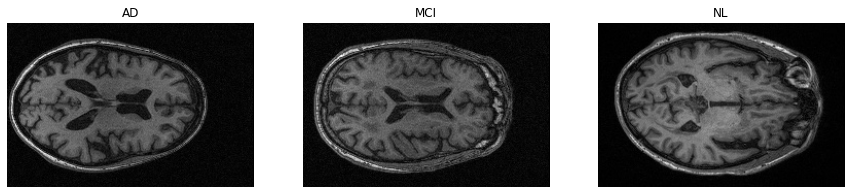

In [84]:
# Visualize Different MRI images of 3 classes of axial axis without any preprocessing
import matplotlib.image as mpimg
%pylab inline
import matplotlib.pyplot as plt

imagelabels = ['./Train/AD/AIBL_658_MR_MPRAGE_ADNI_confirmed__br_raw_20100331120706013_62_S82617_I1699511.jpg',"./Train/MCI/AIBL_217_MR_MPRAGE_ADNI_confirmed__br_raw_20100326152626470_115_S82129_I1692891.jpg",
              "./Train/NL/AIBL_1001_MR_MPRAGE_ADNI_confirmed__br_raw_20090107131126410_3_S61338_I1328731.jpg"]
labels = ["AD","MCI","NL"]

#Plotting Different MRI images of 3 classes of axial axis without any preprocessing
plt.figure(figsize=(15,15))
for i in range(len(imagelabels)):
    img = mpimg.imread(imagelabels[i])
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

In [2]:
#Function to resample images to a common isotropic resolution of 2mm
def resample_img(itk_image, out_spacing=[2.0, 2.0, 2.0]):
    """ resample SITK 3D MRI images to a common isotropic resolution of 2mm
    Args:
        itk_image: Original SITK 3D MRI image
        out_spacing(list): List of required required voxel size
    
    Return:
         Resampled SITK 3D MRI image
    """
    
    #Obtain original spacing
    original_spacing = itk_image.GetSpacing()
    #Obtain original size
    original_size = itk_image.GetSize()

    #Output image size
    out_size = [
        int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
        int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
        int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))]

    #Initalize resample filter
    resample = sitk.ResampleImageFilter()
    #Setting output space
    resample.SetOutputSpacing(out_spacing)
    #Setting output size
    resample.SetSize(out_size)
    #Setting output direction
    resample.SetOutputDirection(itk_image.GetDirection())
    #Setting output origin
    resample.SetOutputOrigin(itk_image.GetOrigin())
    #Setting transform
    resample.SetTransform(sitk.Transform())
    #Setting pixel value
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    #Setting interpolator as BSpline
    resample.SetInterpolator(sitk.sitkBSpline)

    #return Resampled SITK 3D MRI image
    return resample.Execute(itk_image)

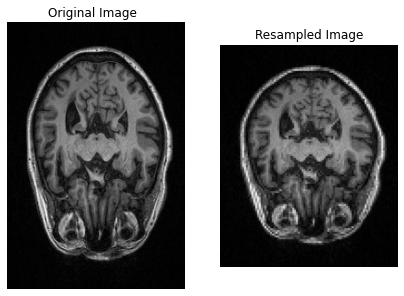

In [3]:
#Display original image and resampled image in axial axis
imag = "./AD/AIBL_1013_MR_MPRAGE_ADNI_confirmed__br_raw_20100518160542098_41_S85107_I173974.nii"
sitk_image = sitk.ReadImage(imag,sitk.sitkUInt16)
img = sitk.GetArrayFromImage(sitk_image)

resp = resample_img(sitk_image)
resp1 = sitk.GetArrayFromImage(resp)


plt.figure(figsize=(7, 7))
plt.subplot(1,2,1)
plt.imshow(img[140,:,:], cmap='gray')
plt.title("Original Image  ")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Resampled Image")
plt.imshow(resp1[70,:,:], cmap='gray')

plt.axis("off")
plt.show()


In [4]:
#Helper functions for displaying images and graph for image registration 
#Code obtained and adapted from SITK library (http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/60_Registration_Introduction.html) 


def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()
    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

In [5]:
#Load and Read Reference Fixed MNI305 3D MRI image
fixed_image1 =  sitk.ReadImage("./average305_t1_tal_lin.nii", sitk.sitkFloat32)
#Resample Reference Fixed MNI305 3D MRI image
fixed_image = resample_img(fixed_image1)

In [6]:
#Code adapted from SITK library (http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/60_Registration_Introduction.html)
#Image registration function using SITK
def regis(fixedimage,movingimage):
    """ Image registration of MRI images by mapping moving AIBL image to fixed MNI305 image
    Args:
        fixedimage: Reference MNI305 3D MRI image
        movingimage: Moving AIBL 3D MRI image
    Return:
         Registered SITK 3D MRI image
    """
    fixed_image =  fixedimage
    moving_image = movingimage
    
    #Intial transfromation of center alligning both images
    initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

    moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, 0.0, 
                                     moving_image.GetPixelID())
    registration_method = sitk.ImageRegistrationMethod()

    # Similarity metric as Mattes Mutual Information
    registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.01)
    registration_method.SetInterpolator(sitk.sitkLinear)
    # Optimizer as Gradiet Descent
    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, 
                                                      convergenceMinimumValue=1e-6, convergenceWindowSize=10)
    registration_method.SetOptimizerScalesFromPhysicalShift()

    # Setup for the multi-resolution framework.            
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
    registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
    # Intial transformation setup
    registration_method.SetInitialTransform(initial_transform, inPlace=False)

    #Plotting during registration.
    registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
    registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
    registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
    registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))
    #Final Transformation
    final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                                   sitk.Cast(moving_image, sitk.sitkFloat32))
    #Registered 3D MRI image
    moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

    interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05),
             fixed = fixed(fixed_image), moving=fixed(moving_resampled));
    #Return Registered 3D MRI image
    return moving_resampled

In [7]:
#Function to do both image resampling and image registration
def spatial_registration(srcpath,destpath):
    """ image resampling and image registration function
    Args:
        srcpath: source directory path
        destpath: destination directory path  
    """
    #Loop through source image dataset
    for (root,dirs,files) in os.walk(srcpath, topdown=True):
        for file in files:
            #obtain source image path
            niiimage = os.path.join(root,file)
            #Read source 3D MRI image
            sitk_moving = sitk.ReadImage(niiimage,sitk.sitkFloat32)
            #Resample source 3D MRI image
            sitk_movings = resample_img(sitk_moving)
            #Register resampled 3D MRI image
            registrated = regis(fixed_image, sitk_movings)

            #Save resampled and registered image in destination directory
            sitk.WriteImage(registrated, os.path.join(destpath, file))

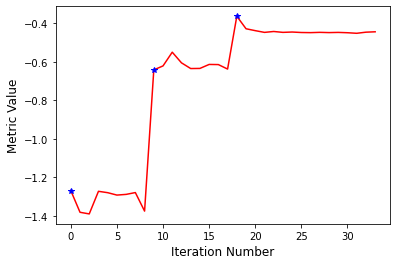

interactive(children=(IntSlider(value=38, description='image_z', max=77), FloatSlider(value=0.5, description='…

In [9]:
spatial_registration("./Raw_3D_MRI_images_without_preprocessing/Test/AD","Preprocessed_3D_MRI_images/Test/AD")